In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import bosten_evaluation_my_work as bev
%matplotlib inline

In [15]:
boston_dataset = load_boston()

In [16]:
type(boston_dataset)

sklearn.utils.Bunch

In [17]:
dir(boston_dataset)    

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [18]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
boston_dataset.data.shape

(506, 13)

In [20]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [22]:
data = pd.DataFrame(data= boston_dataset.data, columns= boston_dataset.feature_names )
data["PRICE"] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [24]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [25]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


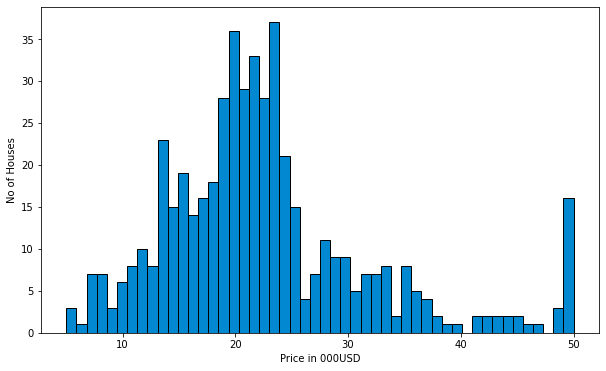

In [27]:
plt.figure(figsize=(10,6))
plt.hist(data["PRICE"], bins=50, ec= "black", color="#0288D1")
plt.xlabel("Price in 000USD")
plt.ylabel("No of Houses")
plt.show()

<Figure size 720x432 with 0 Axes>

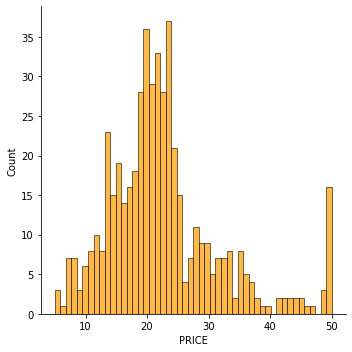

In [28]:
plt.figure(figsize=(10,6))
sns.displot(data["PRICE"],bins=50, color="#FFA000", kde= False)
plt.show()

<Figure size 720x432 with 0 Axes>

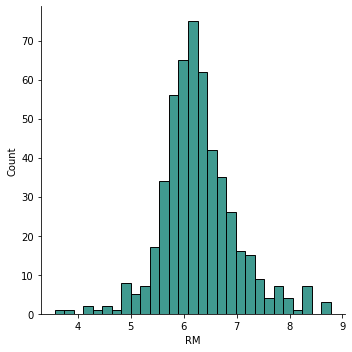

In [29]:
plt.figure(figsize=(10,6))
sns.displot(data["RM"], color="#00796B", kde= False)
plt.show()

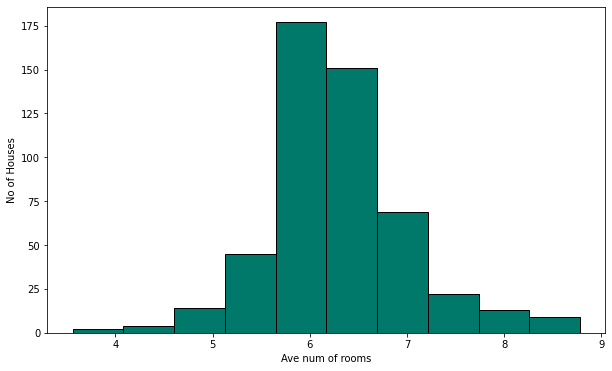

In [30]:
plt.figure(figsize=(10,6))
plt.hist(data["RM"], ec= "black", color="#00796B")
plt.xlabel("Ave num of rooms")
plt.ylabel("No of Houses")
plt.show()

In [31]:
data["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [32]:
data["RM"].mean()

6.284634387351787

In [33]:
data["RAD"].describe()


count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

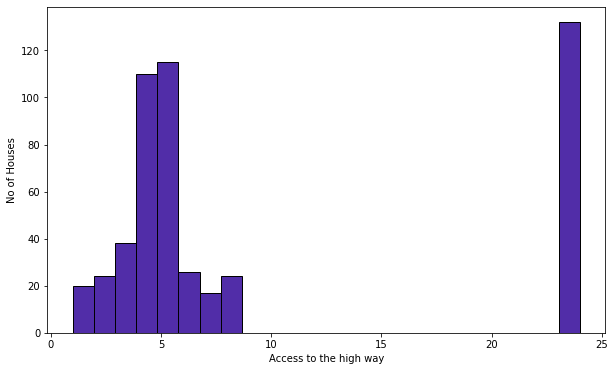

In [34]:
plt.figure(figsize=(10,6))
plt.hist(data["RAD"], ec= "black", color="#512DA8", bins=24)
plt.xlabel("Access to the high way")
plt.ylabel("No of Houses")
plt.show()

In [35]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

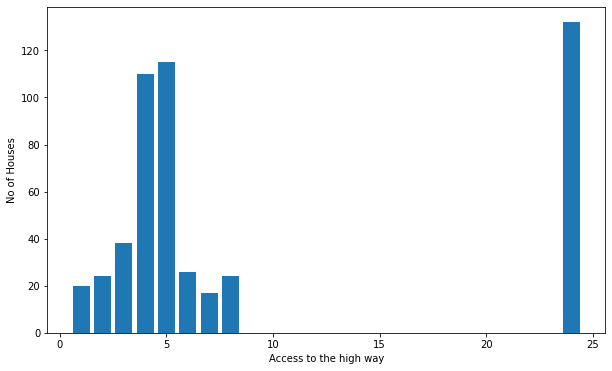

In [36]:
freq = data["RAD"].value_counts()
#freq.index
plt.figure(figsize=(10,6))
plt.bar(freq.index,freq)
plt.xlabel("Access to the high way")
plt.ylabel("No of Houses")
plt.show()

In [37]:
print(data["CHAS"].value_counts())


0.0    471
1.0     35
Name: CHAS, dtype: int64


In [38]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
data["PRICE"].corr(data["RM"])     # the correlation between the num of romms and the house price

0.695359947071539

In [40]:
data["PRICE"].corr(data["PTRATIO"])   
# the correlation between the pupil-teacher ratio by town and the house price                   

-0.5077866855375615

In [41]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [42]:
filter_corr = np.zeros_like(data.corr())
tariangle_corr = np.triu_indices_from(filter_corr)
filter_corr[tariangle_corr] = True

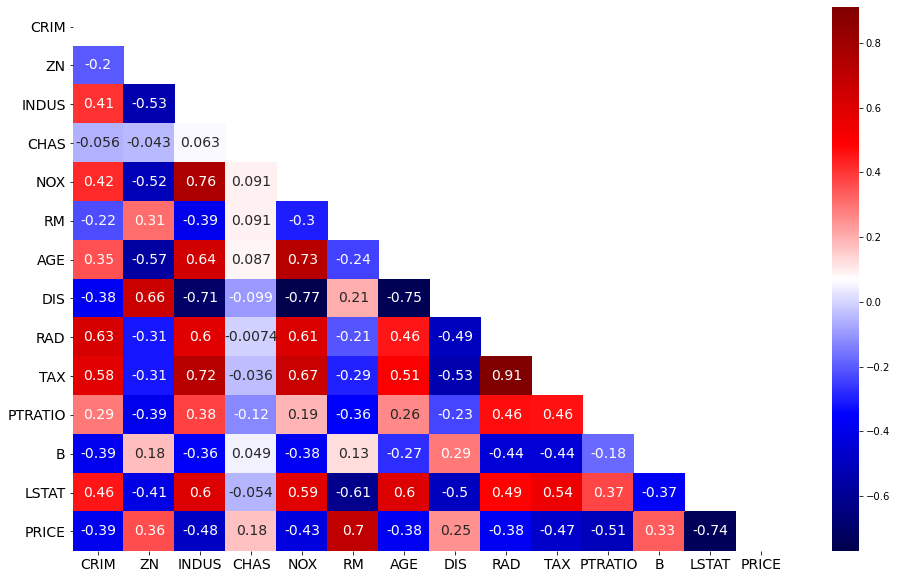

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), cmap= "seismic", mask=filter_corr, annot=True, annot_kws=({"size": 14}))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

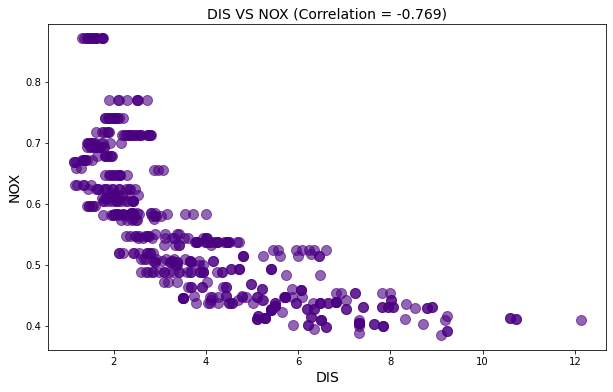

In [44]:
plt.figure(figsize=(10,6))
dis_nox_corr = round(data["DIS"].corr(data["NOX"]), 3)
plt.scatter(data["DIS"], data["NOX"], s=100, color="indigo", alpha=0.6)
plt.title(f"DIS VS NOX (Correlation = {dis_nox_corr})", fontsize=14)
plt.xlabel("DIS",fontsize=14)
plt.ylabel("NOX",fontsize=14)
plt.show()

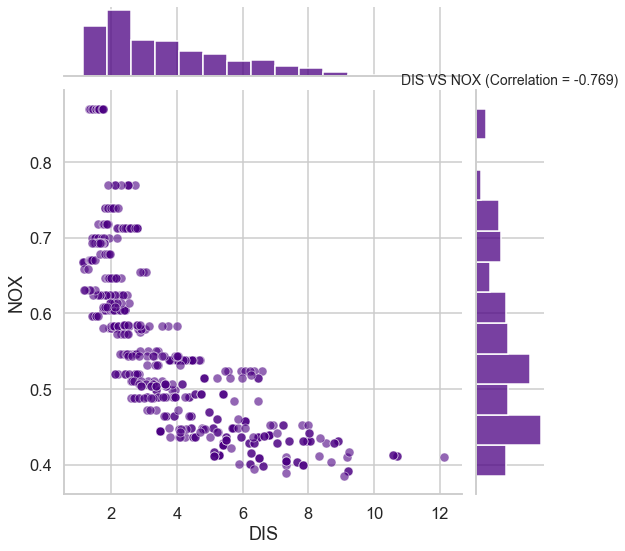

In [45]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], height=8, color="indigo", joint_kws={"alpha" : 0.6})
dis_nox_corr = round(data["DIS"].corr(data["NOX"]), 3)
plt.title(f"DIS VS NOX (Correlation = {dis_nox_corr})", fontsize=14)
plt.show()

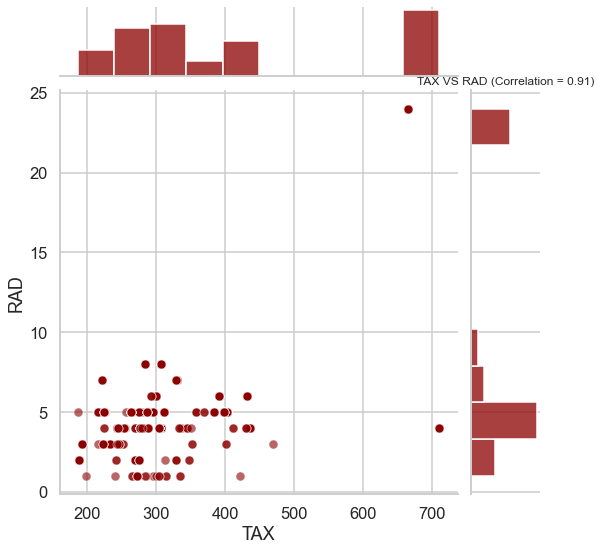

In [46]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["TAX"], y=data["RAD"], height=8, color="darkred", joint_kws={"alpha" : 0.6})
dis_nox_corr = round(data["TAX"].corr(data["RAD"]), 3)
plt.title(f"TAX VS RAD (Correlation = {dis_nox_corr})", fontsize=12)
plt.show()

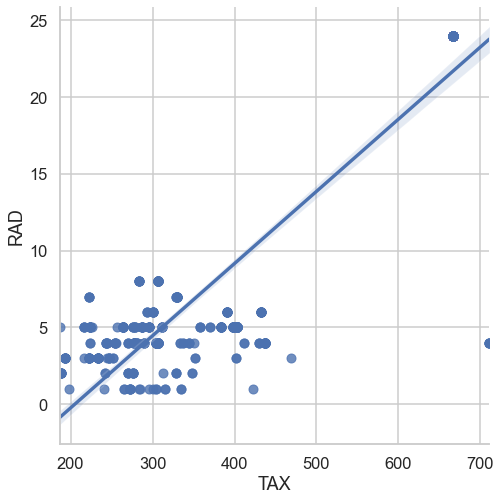

In [47]:
sns.lmplot(x="TAX", y="RAD", data=data, height=7)
plt.show()

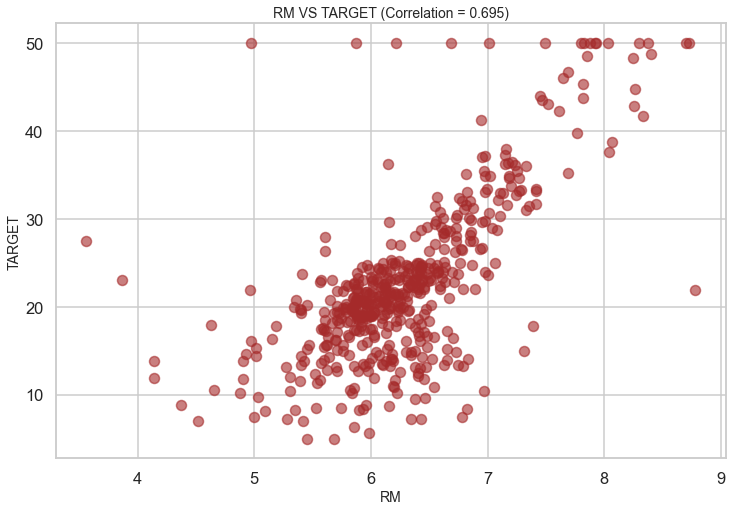

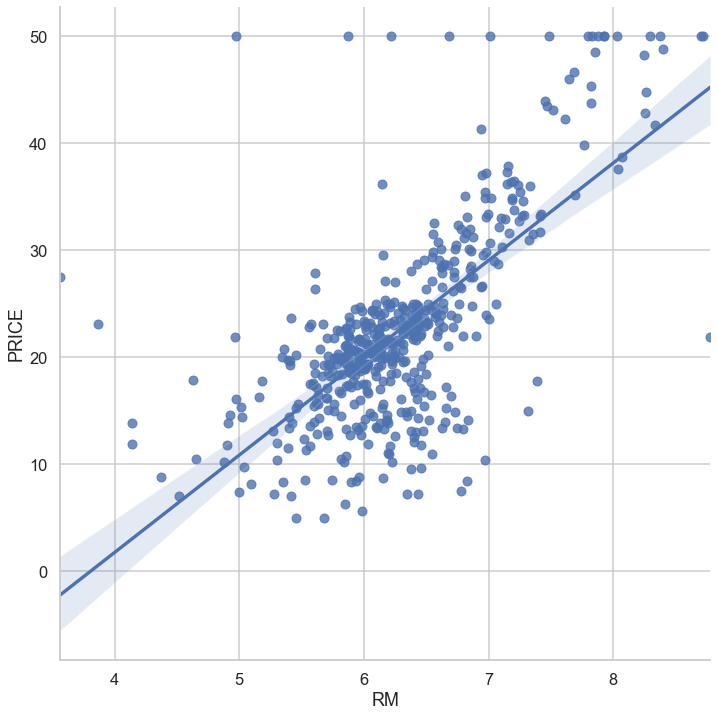

In [48]:
plt.figure(figsize=(12,8))
RM_TRG_corr = round(data["RM"].corr(data["PRICE"]), 3)
plt.scatter(data["RM"], data["PRICE"], s=100, color="BROWN", alpha=0.6)
plt.title(f"RM VS TARGET (Correlation = {RM_TRG_corr})", fontsize=14)
plt.xlabel("RM",fontsize=14)
plt.ylabel("TARGET",fontsize=14)
sns.lmplot(x="RM", y="PRICE", data=data, height=10)
plt.show()

In [49]:
# %%time
# sns.pairplot(data)
# plt.show()

In [50]:
# %%time

#sns.pairplot(data,kind='reg', plot_kws={"line_kws" : {"color" : "cyan"}})
#plt.show()

# Training and Testing data 

In [51]:
price = data["PRICE"]
features = data.drop(labels="PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

In [52]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [53]:
print("The R-squared of the training data set", regr.score(X_train, y_train))
print("The R-squared of the test data set", regr.score(X_test, y_test))
print("Intercept: ", regr.intercept_)
coffecient = regr.coef_
print(pd.DataFrame(coffecient, index= features.columns, columns=["Cofe"]))

The R-squared of the training data set 0.750121534530608
The R-squared of the test data set 0.6709339839115628
Intercept:  36.53305138282439
              Cofe
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626


In [54]:
data["PRICE"].skew()

1.1080984082549072

In [55]:
y_log = np.log(data["PRICE"])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [56]:
y_log.skew()

-0.33032129530987864

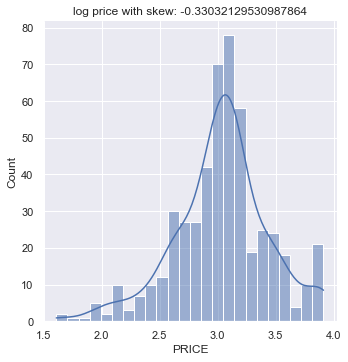

In [57]:
sns.set()
sns.displot(y_log,kde= True)
plt.title(f"log price with skew: {y_log.skew()}")
plt.show()

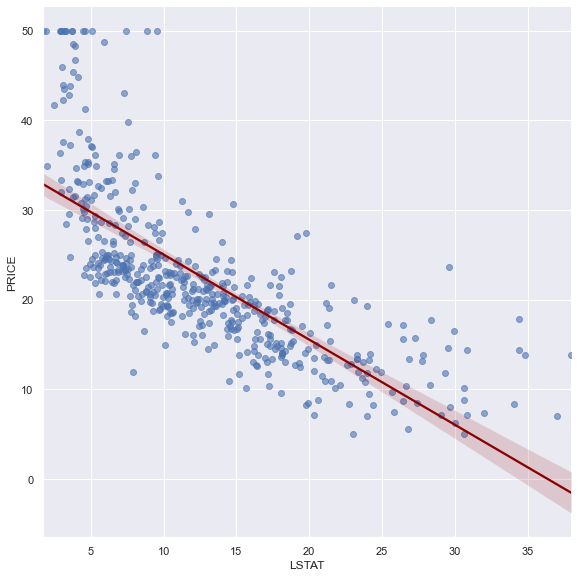

In [58]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, height=8, scatter_kws={"alpha" : 0.6},line_kws= {"color" : "darkred"}  )
plt.show()

In [59]:
price = np.log(data["PRICE"])
features = data.drop(labels="PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("The R-squared of the training data set", regr.score(X_train, y_train))
print("The R-squared of the test data set", regr.score(X_test, y_test))
print("Intercept: ", (regr.intercept_))
coffecient = (regr.coef_)
print(pd.DataFrame(coffecient, index= features.columns, columns=["Cofe"]))


The R-squared of the training data set 0.7930234826697583
The R-squared of the test data set 0.7446922306260724
Intercept:  4.05994387177519
             Cofe
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390


In [60]:
np.e**(0.080331)

1.0836456950439142

# P VALUE

In [61]:
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()
#results.params
#results.pvalues

pd.DataFrame(data={"params" : results.params, "Pvalues" : round(results.pvalues, 3) })

,params,Pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


# Multicollinearity 

In [62]:
variance_inflation_factor(exog=X_inc_const.values, exog_idx=1)

1.7145250443932485

In [63]:
print(len(X_inc_const.columns))

14


In [64]:
X_inc_const.shape[1]

14

# VIF calculation for all features.

In [65]:
vif_list = []

for i in range(0,len(X_inc_const.columns)):
    vif = round(variance_inflation_factor(exog=X_inc_const.values, exog_idx=i),2)
    vif_list.append(vif)
pd.DataFrame(data= {"Coffecient" : X_inc_const.columns, "VIF" :vif_list }) 

,Coffecient,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [66]:
# Original model with log price and all features

X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()

org_cofe = pd.DataFrame(data={"params" : results.params, "Pvalues" : round(results.pvalues, 3) })
print(org_cofe)

results.summary()    # To get all model summry (R-squared & BIC )
print("BIC: ", results.bic)
print("R-Squared: ", results.rsquared)

           params  Pvalues
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000
BIC:  -139.74997769478875
R-Squared:  0.7930234826697582


In [67]:
# Reduce model : 1- excluding feature INDS

X_inc_const = sm.add_constant(X_train)
X_inc_const = X_inc_const.drop(["INDUS"], axis=1)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()

cofe_min_indus = pd.DataFrame(data={"params" : results.params, "Pvalues" : round(results.pvalues, 3) })
print(cofe_min_indus)

results.summary()    # To get all model summry (R-squared & BIC )
print("BIC: ", results.bic)
print("R-Squared: ", results.rsquared)

           params  Pvalues
const    4.056231    0.000
CRIM    -0.010721    0.000
ZN       0.001551    0.010
CHAS     0.082795    0.032
NOX     -0.673365    0.000
RM       0.071739    0.000
AGE      0.000766    0.207
DIS     -0.049394    0.000
RAD      0.014014    0.000
TAX     -0.000596    0.000
PTRATIO -0.034126    0.000
B        0.000511    0.000
LSTAT   -0.031262    0.000
BIC:  -145.14508855591163
R-Squared:  0.7927126289415163


In [68]:
# Reduce model : 2- excluding feature INDS & AGE

X_inc_const = sm.add_constant(X_train)
X_inc_const = X_inc_const.drop(["INDUS" , "AGE"], axis=1)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()

cofe_min_indus_AGE = pd.DataFrame(data={"params" : results.params, "Pvalues" : round(results.pvalues, 3) })
print(cofe_min_indus_AGE)

results.summary()    # To get all model summry (R-squared & BIC )
print("BIC: ", results.bic)
print("R-Squared: ", results.rsquared)

           params  Pvalues
const    4.035922    0.000
CRIM    -0.010702    0.000
ZN       0.001461    0.014
CHAS     0.086449    0.025
NOX     -0.616448    0.000
RM       0.076133    0.000
DIS     -0.052692    0.000
RAD      0.013743    0.000
TAX     -0.000590    0.000
PTRATIO -0.033481    0.000
B        0.000518    0.000
LSTAT   -0.030271    0.000
BIC:  -149.49934294224656
R-Squared:  0.7918657661852815


In [69]:
compared_cofe = [org_cofe, cofe_min_indus, cofe_min_indus_AGE]
pd.concat(compared_cofe, axis=1)

,params,Pvalues,params,Pvalues,params,Pvalues
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [70]:
type(org_cofe)

pandas.core.frame.DataFrame

# The residuals & the residuals polt

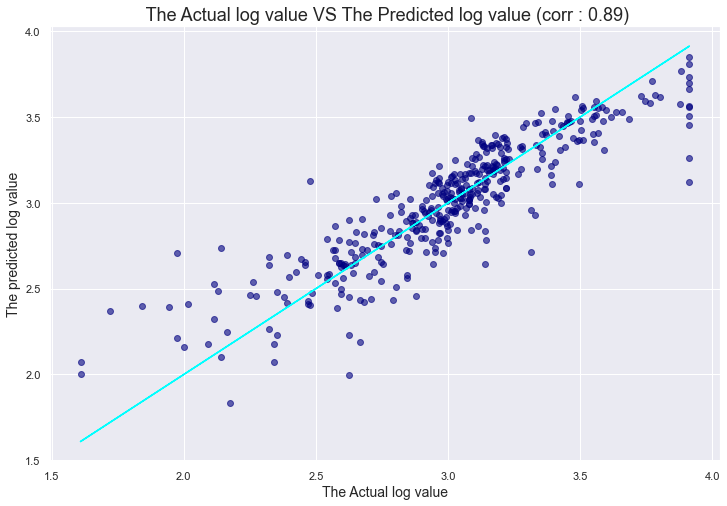

In [71]:
price = np.log(data["PRICE"])
features = data.drop(labels=["PRICE","INDUS","AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)


X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()

residual = y_train - results.fittedvalues
#residual.describe()
#results.resid

corr = round(y_train.corr(results.fittedvalues),2)
corr
plt.figure(figsize=(12,8))
plt.scatter(x=y_train, y=results.fittedvalues, color="navy",alpha=0.6)
plt.plot(y_train, y_train, color="cyan")
plt.xlabel("The Actual log value", fontsize= 14)
plt.ylabel("The predicted log value", fontsize= 14)
plt.title(f" The Actual log value VS The Predicted log value (corr : {corr})", fontsize=18)
plt.show()

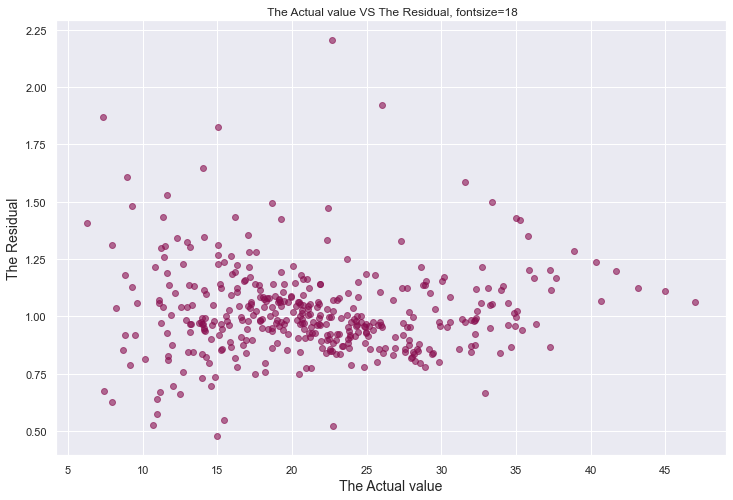

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(x=np.e**results.fittedvalues, y=np.e**results.resid,alpha=0.6, color="#880e4f")
plt.xlabel("The Actual value", fontsize= 14)
plt.ylabel("The Residual", fontsize= 14)
plt.title(" The Actual value VS The Residual, fontsize=18")
plt.show()

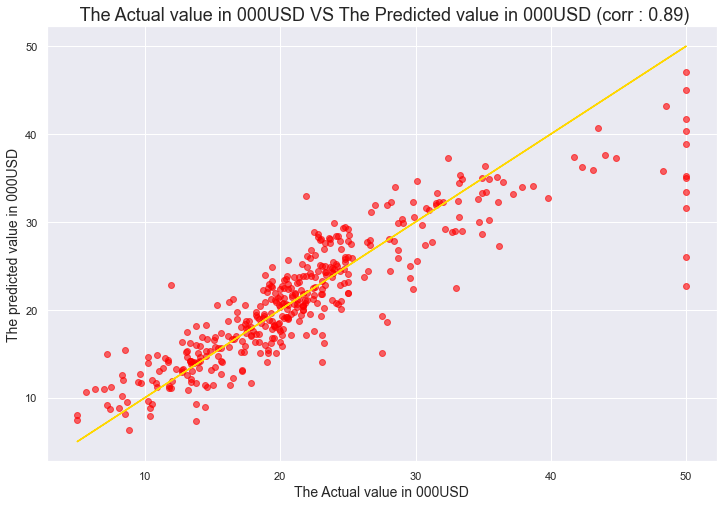

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues,alpha=0.6, color="red")
plt.plot(np.e**y_train, np.e**y_train, color="gold")
plt.xlabel("The Actual value in 000USD", fontsize= 14)
plt.ylabel("The predicted value in 000USD", fontsize= 14)
plt.title(f" The Actual value in 000USD VS The Predicted value in 000USD (corr : {corr})", fontsize=18)
plt.show()

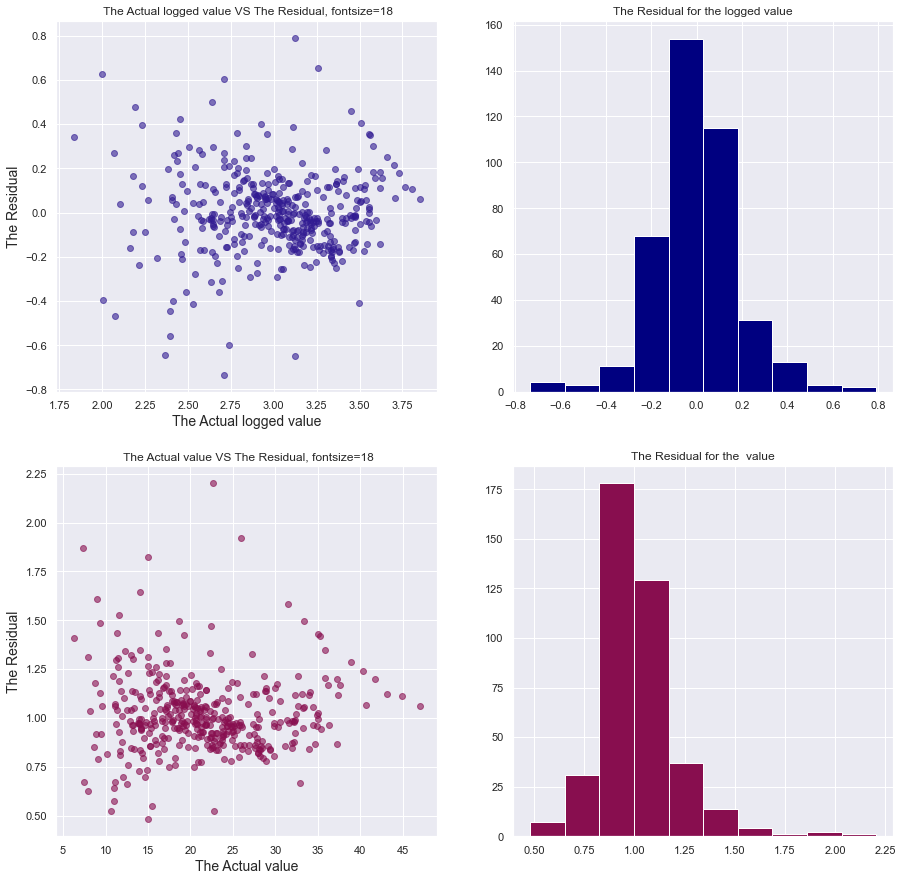

In [74]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(x=results.fittedvalues, y=results.resid,alpha=0.6, color="#311b92")
plt.xlabel("The Actual logged value", fontsize= 14)
plt.ylabel("The Residual", fontsize= 14)
plt.title(" The Actual logged value VS The Residual, fontsize=18")

plt.subplot(2,2,2)
plt.hist(results.resid, color="navy")
plt.title("The Residual for the logged value")

plt.subplot(2,2,3)
plt.scatter(x=np.e**results.fittedvalues, y=np.e**results.resid,alpha=0.6, color="#880e4f")
plt.xlabel("The Actual value", fontsize= 14)
plt.ylabel("The Residual", fontsize= 14)
plt.title(" The Actual value VS The Residual, fontsize=18")

plt.subplot(2,2,4)
plt.hist(np.e**results.resid, color="#880e4f")
plt.title("The Residual for the  value")

plt.show()

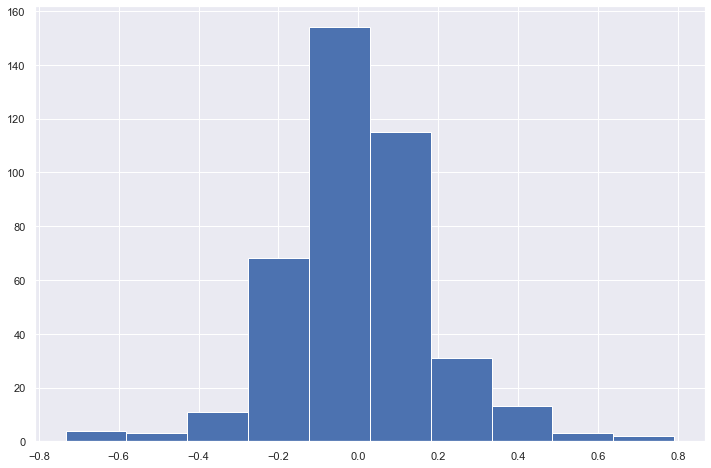

 the mean of the residual: -0.0
 the skew of the residual: 0.118


In [75]:
plt.figure(figsize=(12,8))
plt.hist(results.resid)
plt.show()
print(f" the mean of the residual: {round(results.resid.mean(),3)}")
print(f" the skew of the residual: {round(results.resid.skew(),3)}")

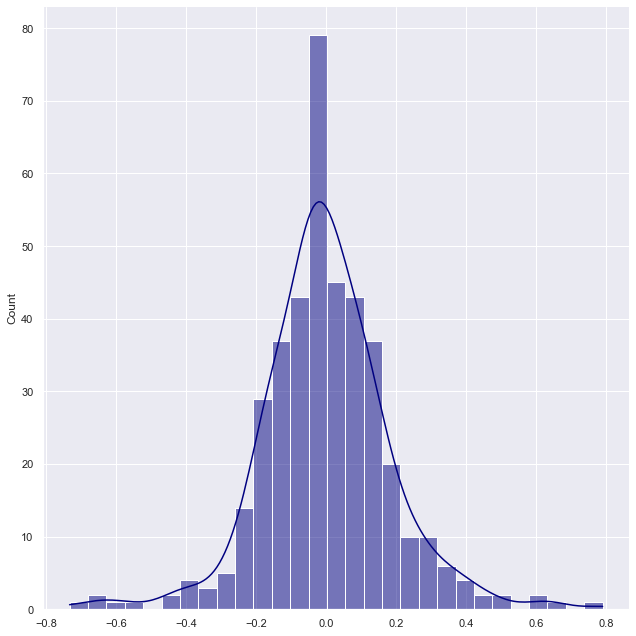

In [76]:
sns.displot(results.resid, kde=True, height=9, color="navy")
plt.show()

In [77]:
price = np.log(data["PRICE"])
features = data.drop(labels=["PRICE","INDUS","AGE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)


X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()
mse_log_value = results.mse_resid
r_squred_log_value = results.rsquared
print("MSE for the log model", results.mse_resid)
print("R^2 for the log model", results.rsquared)

MSE for the log model 0.034873370823545975
R^2 for the log model 0.7918657661852815


In [78]:
price = (data["PRICE"])
features = data.drop(labels=["PRICE"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)


X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_const)
results = model.fit()

mse_org_value = results.mse_resid
r_squred_org_value = results.rsquared
print("MSE for the log model", results.mse_resid)
print("R^2 for the log model", results.rsquared)

MSE for the log model 19.921197403247984
R^2 for the log model 0.750121534530608


In [81]:
pd.DataFrame({"R^2" : [r_squred_log_value, r_squred_org_value ], "MSE" : [mse_log_value,mse_org_value ], 
              "RMSE" : np.sqrt([mse_log_value,mse_org_value ])}, 
             index=["The logged model", "The org model"])

,R^2,MSE,RMSE
The logged model,0.791866,0.034873,0.186744
The org model,0.750122,19.921197,4.463317


In [82]:
bev.property_price(rm=4, ptratio=15, dis=6)

The estimate property price 340745.17678132385
the hi estimate 388994.97227539023
the low estimate 292495.3812872575
confidance 95


(array([[340745.17678132]]),
 array([[388994.97227539]]),
 array([[292495.38128726]]),
 95)